In [2]:
from main_functions import *

from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

In [3]:
df = pd.read_excel('database.xlsx')

#  We clean the data but do not change the slashed in block ratio. We also create another df with variances (zero if not reported)
df, df_var = cleanDataWithVariances(df, ['±', '/'], ['Block_ratio', 'Hard_block', 'Soft_block', 'ignore_row', 'sec', 'sterochemistry' ] )


df = df.infer_objects()
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

#  possible to also print df_var
df_var#
#  printing df
df

/Users/david/polyAGM/polymer_regression_analysis.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][number] = float(df[col][number])
/Users/david/polyAGM/polymer_regression_analysis.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variances[col][number] = 0
/Users/david/polyAGM/polymer_regression_analysis.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][number] = float(finalValue)
/Users/david/polyAGM/polym

,Monomers,Hard_block,Soft_block,Big_Smile,Mn_(kg_mol),Block_ratio,pct_hard_segment,Dispersity,Tg,Tg2,Tm,Tc,E_(MPa),σbreak (MPa),εbreak (pct),X(T),Paper,ignore_row,sec,stereochemistry
0,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,29.2,31:157:31,31.000000,1.18,-43.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
1,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,33.4,45:159:45,39.000000,1.16,-43.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
2,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,35.2,50:162:50,41.000000,1.08,-42.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
3,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,46.0,93:151:93,58.000000,1.19,-44.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
4,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,60.0,144:145:144,69.000000,1.40,-55.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
5,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,80.0,203:169:203,73.000000,1.35,-44.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
6,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,26.0,50:91:50,55.000000,1.11,-41.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
7,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,35.2,67:124:67,55.000000,1.17,-42.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
8,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,90.0,181:295:181,58.000000,1.18,-45.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0
9,"D,L lactide/6-methyl-ε-caprolactone","D,L lactide",6mεCL,{O[C@@H](C)C(=O)O[C@H](C)C(=O)}{OC(C)CCCCC(=O)...,122.0,85:761:85,20.000000,1.18,-43.0,50.0,NaN,NaN,1.87,10.20,1880.0,61.2,https://pubs.acs.org/doi/full/10.1021/ma201063t,NaN,NaN,1.0


## Creates Morgan Fingerprints Feature Vectors

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

In [4]:
#  Identifying rows without block ratios. This will later be used to match the appropriate target property with its related polymer
rows_with_null_block_ratios = df['Block_ratio'].isnull()
# print(rows_with_null_block_ratios)


rows_to_ignore = []

num_entries = len(df['Monomers'])
for row in range(num_entries):
    if df['ignore_row'][row] == 1:
        rows_to_ignore.append(row)

# print(rows_to_ignore)     

rows_to_also_ignore = [27,64, 65,66,67,68, 86, 89, 90]

rows_to_ignore = rows_to_ignore + rows_to_also_ignore

print(rows_to_ignore)


for r_to_ignore in rows_to_ignore:
    rows_with_null_block_ratios[r_to_ignore] = True
# print(rows_with_null_block_ratios)    

smiles = df['Big_Smile']


# smiles = [strig]
# block_ratios = ['1:1:1']

block_ratios = df['Block_ratio']
print(block_ratios)


rows_with_stereo = [(df['stereochemistry'][row] == 1) for row in range(num_entries)]
# rows_with_stereo

CHIRALITY = True
HYDROGENS = False

print("about to create full_pols")
# full_pols = from_smiles_to_networkx(smiles, block_ratios, rows_with_null_block_ratios, rows_with_stereo, use_chiral = CHIRALITY, explicit_H = HYDROGENS)

# need to run this for differnt radius
radi = 1
full_pols = from_smiles_to_morgan_dict(smiles, block_ratios, rows_with_null_block_ratios, rows_with_stereo, use_chiral = CHIRALITY, explicit_H = HYDROGENS, rad = radi)

max_index = 0 
for pol in full_pols:
    non_zero = pol.GetNonzeroElements()
    if max(non_zero.keys()) > max_index:
        max_index = max(non_zero.keys())
print(max_index)

all_indexes = np.array([])
for pol in full_pols[:]:
    non_zero = pol.GetNonzeroElements()

    all_indexes = np.concatenate([all_indexes, np.array(list(non_zero.keys()))])
    all_indexes = np.unique(all_indexes)

sorted_indexes = np.sort(all_indexes)

# Creating feature vectors only with fingerprints that are non-zero in at least one polymer.
features_morgan = np.zeros((len(full_pols), len(sorted_indexes)))
for f in range(len(full_pols)):
    print(f)
    for feature_id in (full_pols[f].GetNonzeroElements()).keys():
        position_of_key = np.where(sorted_indexes == feature_id)
        features_morgan[f][position_of_key] = full_pols[f].GetNonzeroElements()[feature_id]

print("lenght of vectors", len(features_morgan[0]))

# idx = np.argwhere(np.all(features_morgan[..., :] == 0, axis=0))
# features_morgan_2 = np.delete(features_morgan, idx, axis=1)

pickle.dump(features_morgan, open("./temp/dataset_explicit_vectors/pol_morgan_all_non_zero_rad_{}_stereo_from_sparse.pickle".format(radi), "wb"))

[37, 38, 39, 40, 55, 56, 59, 60, 61, 62, 63, 64, 77, 78, 84, 85, 27, 64, 65, 66, 67, 68, 86, 89, 90]
0           31:157:31
1           45:159:45
2           50:162:50
3           93:151:93
4         144:145:144
5         203:169:203
6            50:91:50
7           67:124:67
8         181:295:181
9           85:761:85
10        175:762:175
11          53:194:53
12          81:189:81
13          48:161:48
14          47:161:47
15          78:193:78
16          77:193:77
17          90:194:90
18        107:194:107
19           46:61:46
20           34:63:34
21           24:62:24
22           14:62:14
23         52:1053:52
24        111:991:111
25          80:390:80
26        139:383:139
27        458:211:458
28          62:593:62
29          66:593:66
30      73:502/151:73
31    101:507/153:101
32    166:502/151:166
33       42:117/35:42
34           18:59:18
35        125:588:125
36        166:588:166
37       144:1042:144
38        138:782:138
39        141:647:141
40        122:481:1

In [ ]:
rad = 1

In [ ]:
pickle.dump(features_morgan_2, open("./temp/dataset_explicit_vectors/pol_morgan_all_non_zero_rad_{}_stereo_from_sparse.pickle".format(rad), "wb"))

In [237]:
Graphs = features_morgan_2


In [ ]:
graphs

## Auxiliary Variables

In [105]:
# Gettings names of polymers with no null block ratio
# names = df['Monomers']
names = df['Hard_block'].astype(str) +"/"+ df["Soft_block"]
print(names)
colours = ['black', 'lightcoral', 'sandybrown', 'indianred', 'brown', 'chocolate', 'gold', 'fuchsia', 'darkkhaki', 'olive', 'steelblue', 'darkorange','darkolivegreen','deepskyblue', 'tan', 'moccasin', 'orange','red', 'gold', 'darkkhaki', 'olive', 'forestgreen', 'skyblue', 'rebeccapurple', 'yellow', 'yellowgreen', 'greenyellow', 'chartreuse', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'skyblue', 'rebeccapurple', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mintcream', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'mediumturquoise', 'azure', 'lightcyan', ]
# colours = ['black', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'tan', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'darkkhaki', 'lightyellow', 'lightgoldenrodyellow', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mintcream', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'mediumturquoise', 'azure', 'lightcyan', 'paleturquoise', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'aqua', 'cyan', 'darkturquoise', 'cadetblue', 'powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 'aliceblue', 'dodgerblue', 'lightslategray', 'lightslategrey', 'slategray', 'slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'ghostwhite', 'lavender', 'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'thistle', 'plum', 'violet', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'lavenderblush', 'palevioletred', 'crimson', 'pink', 'lightpink']


name_to_colour_dict = dict()
counter = 0
for name in names:
    if name not in name_to_colour_dict.keys():
        name_to_colour_dict[name] = colours[counter]
        counter += 1 
print(name_to_colour_dict)
    
polymer_names = []
polymer_numbers = []
polymer_colours = []
for counter in range(len(names)):
    if len(rows_with_null_block_ratios) != 0:
        if rows_with_null_block_ratios[counter]:
            continue
    polymer_names.append(names[counter]) 
    polymer_numbers.append(counter) 
    polymer_colours.append(name_to_colour_dict[names[counter]])

print(polymer_numbers)
# polymer_names

#  DF with structures of monomers and smiles. 
monomers_df = pd.read_excel('monomers with smiles and structures(1).xlsx')
monomers_df

# Creating dict of whether a monomer is part of the hard block
is_hard_block = dict(zip(monomers_df.Monomer, monomers_df.Hard_Block))
print(is_hard_block)

# Creating dict of polymer SMILEs
smiles_of_monomer = dict(zip(monomers_df.Monomer, monomers_df.SMILES))
print(smiles_of_monomer)

# Creating dict of polymer molar mass
molar_mass_of_monomer = dict(zip(monomers_df.Monomer, monomers_df.Molar_mass))
print(molar_mass_of_monomer)

0        D,L lactide/6mεCL
1        D,L lactide/6mεCL
2        D,L lactide/6mεCL
3        D,L lactide/6mεCL
4        D,L lactide/6mεCL
5        D,L lactide/6mεCL
6        D,L lactide/6mεCL
7        D,L lactide/6mεCL
8        D,L lactide/6mεCL
9        D,L lactide/6mεCL
10       D,L lactide/6mεCL
11    D,L lactide/menthide
12    D,L lactide/menthide
13      L lactide/menthide
14      D lactide/menthide
15      L lactide/menthide
16      D lactide/menthide
17      L lactide/menthide
18      D lactide/menthide
19         L lactide/SA/PD
20         L lactide/SA/PD
21         L lactide/SA/PD
22         L lactide/SA/PD
23         L lactide/4mεCL
24         L lactide/4mεCL
25         L lactide/4mεCL
26         L lactide/4mεCL
27         L lactide/4mεCL
28       D,L lactide/4mεCL
29         L lactide/4mεCL
30     D,L lactide/εCL/εDL
31     D,L lactide/εCL/εDL
32     D,L lactide/εCL/εDL
33     D,L lactide/εCL/εDL
34         D,L lactide/εDL
35         D,L lactide/εDL
36         D,L lactide/εDL
3

## Transforming into GraKeL Graphs

In [77]:
from grakel.utils import graph_from_networkx

#  Transforming networkX graphs into grakel graphs. 
grakel_pols = graph_from_networkx(full_pols, node_labels_tag='element', edge_weight_tag ='order', as_Graph = False)


#  Getting a list of them rather than an itearable. 

# G = grakel_pols
Graphs = []
for g in grakel_pols:
    Graphs.append(g)
Graphs

AttributeError: 'ULongSparseIntVect' object has no attribute 'nodes'

In [78]:
Graphs = graphs

NameError: name 'graphs' is not defined

## Main Function

In [264]:
def run_kernels_against_target(df, 
                               target, 
                               target_var, 
                               graphs, 
                               number_of_runs, 
                               kernels = ["WLB-3"], 
                               learning_met = 'rf', 
                               error = 'mean_sq', 
                               normalise = True, 
                               explicit_features = False,
                               explanation = False,
                               extra_tests = [],
                               visualisation = False,
                               show_error_bars = False,
                              training_error = False,
                               weight_y_var_train = 1,
                               weight_y_var_train_for_tg_and_tg2 = 1,
                               truncate_to_zero_if_neg = True,
                              log_y = True, 
                              printing_results = False,
                              with_shortest_paths = False,
                              n_shortest_paths_features = 50,
                              RFE_selection = False,
                              RFE_selection_n_features = 50,
                              covar_feature_selection = False,
                               concatenate_depths = False):
    means = []
    stds = []
    size_of_test = 0.1
    runs_for_plot = round((1 / size_of_test) + 1, 0)
    
    # If morgan fingerprints are selected, loads the feature vectors (for all graphs) already pickled. Then, the restrict list is called on them.  
    if kernels[0][0:2] == 'MF':
        print("Morgan Fingerprints Selected")
        radius = int(kernels[0][-1])
        graphs = pickle.load(open("./temp/dataset_explicit_vectors/pol_morgan_all_non_zero_rad_{}_stereo_from_sparse.pickle".format(radius), "rb"))
        
    G, y = restrict_list_of_graphs_based_on_non_null_targets(rows_with_null_block_ratios, graphs, target, rows_with_null_block_ratios)
    G, y_var = restrict_list_of_graphs_based_on_non_null_targets(rows_with_null_block_ratios, graphs, target_var,rows_with_null_block_ratios)
    if len(y) != len(y_var):
        print("Lenght of y and y_var are not the same")
    if len(G) != len(y):
        print("Lenght of G and y are not the same")    
    # Same function also works for restricting the list of polymer names and numbers. 
    names_of_polymers, y = restrict_list_of_graphs_based_on_non_null_targets(rows_with_null_block_ratios, polymer_names, target, rows_with_null_block_ratios)
    numbers_of_polymers, y = restrict_list_of_graphs_based_on_non_null_targets(rows_with_null_block_ratios, polymer_numbers, target, rows_with_null_block_ratios)
    colours_of_polymers, y = restrict_list_of_graphs_based_on_non_null_targets(rows_with_null_block_ratios, polymer_colours, target, rows_with_null_block_ratios) 
    if with_shortest_paths:
        features_shortest_paths, y = restrict_list_of_graphs_based_on_non_null_targets(rows_with_null_block_ratios, features_sp[:, 0:n_shortest_paths_features], target, rows_with_null_block_ratios)
    if len(y) != len(y_var):
        print("Lenght of y and y_var are not the same")
    if len(G) != len(y):
        print("Lenght of G and y are not the same")    
    
    if len(extra_tests) != 0: 
        G_extra_tests = extra_tests
            
    print("> Number of data points for", t, "is", len(y))
    print("> With shortest paths = ", with_shortest_paths)
    print("> With concatenate depth = ", concatenate_depths)
    if normalise:
        normalised_y = pd.DataFrame(y) # normalising y
        normalise_standard(normalised_y)
        y = normalised_y.to_numpy().ravel()
        
        # We don't normalise the variance vector
        y_var = np.array(y_var).ravel()

        
    else:
        y = np.array(y).ravel()
        y_var = np.array(y_var).ravel()
    
    
        
    for ker in kernels:
        print(">> Testing GraKeL kernel:", ker)
        mean_sq_error = []
        mean_sq_training_error = []
        for run in range(number_of_runs):
            # Setting up the slices for kfold
            indices = range(len(G))

#                     n_splits = 10
            n_splits = len(G)
            kfold = KFold(n_splits=n_splits, shuffle=True, random_state=run+1)

            concatenated_y_training_pred = ()
            concatenated_y_training_real = ()
            concatenated_y_pred = ()
            concatenated_y_real = ()
            concatenated_indexes = ()
            concatenated_y_pred_variance = ()


            normalise_X = True
            delete_few_occurances = False
            scaler = preprocessing.MinMaxScaler()
#                     scaler = preprocessing.StandardScaler()
            if len(extra_tests) == 0:


                for index_train, index_test in kfold.split(indices):

                    if ker != "RUnits":
                        if ker[0:2] != 'MF':
                            gk = GRAKEL_KERNELS[ker]() 
                            if not explicit_features:
                                G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=size_of_test, random_state=run)
                                K_train = gk.fit_transform(G_train)
                                K_test = gk.transform(G_test)

                                if len(extra_tests) != 0:
                                    K_extra_test = gk.transform(G_extra_tests)
                            else:
                                if printing_results:
                                    print(">>> Getting Explicit Vectors from Kernel")
                                param = "temp/dataset_explicit_vectors/" + ker + str(t) + str(len(G)) + "Chiral_" + str(CHIRALITY) + 'final'
                                try:
                                    feat = pickle.load(open('{0}.pickle'.format(param), "rb"))
                                    if printing_results:
                                        print(">>>> Pickle found")
                                except (OSError, IOError) as e:
                                    print(">>>> Pickle not found, recomputing")
                                    gk.fit(G)
                                    gk.parse_input(G)
                                    feat = gk._feat_vectors
                                    pickle.dump(feat, open('{0}.pickle'.format(param), "wb"))

    #                                     gk.fit(G)
    #                                     gk.parse_input(G)
    #                                     feat = gk._feat_vectors
                                depth = int(ker[-1]) # this is the last character of the kernel, which indicates depth.
                                if concatenate_depths:
                                    feature_vectors = feat[0]
                                    for i in range(1, depth +1):
                                        feature_vectors = np.concatenate((feature_vectors, feat[i]), axis=1)
                                else:
                                    feature_vectors = feat[depth]
    #                                     print(len(gk._inv_labels[depth]))
                                if printing_results:
                                    print("Dimension of Feature Vectors: ", len(feature_vectors[0]))
    #                                     normalise_X = True

                                if with_shortest_paths:
                                    feature_vectors =  np.concatenate((feature_vectors, features_shortest_paths), axis=1)
                        else: # if morgan fingerprints, we just take the feature vectors already saved as graphs variable
                            G = np.array( G ) # tranform lists into numpy arrays
                            feature_vectors = G # G is already the correct feature vectors
                            print("Size of feature vectors: ", len(feature_vectors[0]))
                            if ker[2] == "B": # This creates binary features, disregarding degree of polimerisation. 
                                feature_vectors[feature_vectors > 1] = 1
                                print("Morgan Fingerprints in Binary Form")
# try:
#                                 radius = 
#                                 feature_vectors = pickle.load(open("./temp/dataset_explicit_vectors/pol_morgan_all_non_zero_rad_{}_stereo_from_sparse.pickle".format(rad), "rb"))
#                                 if printing_results:
#                                     print(">>>> Pickle found")
#                             except (OSError, IOError) as e:
#                                 print(">>>> Pickle not found, recomputing")
#                                 gk.fit(G)
#                             feature_vectors = graphs
                        if delete_few_occurances:
#                                 print(feature_vectors)
                            feature_vectors[feature_vectors < 4] = 0
#                                 print(feature_vectors)
                        if normalise_X:
#                                         min_max_scaler = preprocessing.MinMaxScaler()
                            feature_vectors = scaler.fit_transform(feature_vectors)
#                                     # Using PCA to reduce dimensions
#                                     print("Reducing Dimensions")
#                                     feature_vectors = PCA(n_components=20).fit_transform(feature_vectors)


                        if covar_feature_selection:
                            cor = corr2_coeff(feature_vectors.T,feature_vectors.T)
                            p = np.argwhere(np.triu(np.isclose(corr2_coeff(feature_vectors.T,feature_vectors.T),1),1))
                            if printing_results:
                                print("length before selection:", len(feature_vectors[0]))
                            feature_vectors = np.delete(feature_vectors,p[:,1],axis=1)
                            if printing_results:
                                print("length after selection:", len(feature_vectors[0]))

                        K_train = feature_vectors[index_train]
                        K_test = feature_vectors[index_test]
                        y_train = y[index_train]
                        y_test = y[index_test]
                        y_var_train = y_var[index_train]

                        if len(extra_tests) != 0:
                            gk.fit(G_extra_tests)
                            gk.parse_input(G_extra_tests)
                            feat_extra = gk._feat_vectors
                            feature_vectors_extra = feat_extra[depth]
                            if normalise_X:
                                K_extra_test = scaler.transform(feature_vectors_extra)
#                                         K_extra_test = gk.transform(G_extra_tests)



                
                
                    # We define the learning method for each fold. That only makes a difference when using y_var, as we want to make sure we get y_var[index_train] for each fold
                    met = defining_learning_method(t, learning_met, weight_y_var_train, weight_y_var_train_for_tg_and_tg2, y_var[index_train])


                    if RFE_selection:
                        if printing_results:
                            print(">> Performing REF selection for ", RFE_selection_n_features, " features.")
                        selector = RFE(met, n_features_to_select = RFE_selection_n_features, step=0.01)
                        selector = selector.fit(K_train, y_train)
                        feature_vectors = feature_vectors[:, selector.support_]
                        K_train = feature_vectors[index_train]
                        K_test = feature_vectors[index_test]

                    if log_y:
                        met.fit(K_train, np.log(y_train))
                        y_pred, y_pred_variance = met.predict(K_test,  return_std=True)  
                        print("y_pred ", np.exp(y_pred))
                        print("y_test: ", y_test)
                        y_training_pred, y_training_pred_variance = met.predict(K_train,  return_std=True)
                        print("y_training_pred: ", np.exp(y_training_pred))
                        print("y_training_test: ", y_train)
                        print("MSE of train: ", mean_squared_error(y_train, np.exp(y_training_pred)))
                    else:
                        met.fit(K_train, y_train)
                        y_pred, y_pred_variance = met.predict(K_test,  return_std=True)  
                        if truncate_to_zero_if_neg and t in ['E_(MPa)', 'σbreak (MPa)', 'εbreak (pct)']:
                            y_pred[y_pred < 0] = 0
                        if printing_results:
                            print("y_pred ", y_pred)
                            print("y_test: ", y_test)
                        y_training_pred, y_training_pred_variance = met.predict(K_train,  return_std=True)
#                                 print("y_training_pred: ", y_training_pred)
#                                 print("y_training_test: ", y_train)
                        if printing_results:
                            print("MSE of train: ", mean_squared_error(y_train, y_training_pred))
                    if t == 'N_Tgs':
                        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#                         if run == 0 :
#                             print("Real:", y_test)
#                             print("Pred:", np.around(y_pred, decimals = 1))
                    if error == 'mean_sq':       
                        if log_y:
                            mean_sq_error.append(mean_squared_error(y_test, np.exp(y_pred)))
                             # also calculating the training error: 
                            mean_sq_training_error.append(mean_squared_error(y_train, np.exp(y_training_pred)))
                        else:
                            mean_sq_error.append(mean_squared_error(y_test, y_pred))
                             # also calculating the training error: 
                            mean_sq_training_error.append(mean_squared_error(y_train, y_training_pred))
                    if error == 'r2':
                        mean_sq_error.append(r2_score(y_test, y_pred))
                        mean_sq_training_error.append(r2_score(y_train, y_training_pred))
                    # for extra tests 
                    if len(extra_tests) != 0:
                        print('Extras')
                        y_extra_pred = met.predict(K_extra_test, return_std=True)
                        for test in range(len(G_extra_tests)):
                            print(block_ratios_to_test[test], y_extra_pred[test])
#                         print(y_extra_pred)



                    #  generating some explanations
#                     graph_to_be_explained = 70
                    graph_to_be_explained = 15
                    if printing_results:
                        print("index_test_is", index_test)
                        print("graph is", numbers_of_polymers[index_test[0]])
                    if explanation and numbers_of_polymers[index_test[0]] == graph_to_be_explained:
                        #  This counts the number of different values each feature can have. If this number is less than the threashold, then 
                        # ... the algorithm will treat them as discrete features, as oppposed to getting quartiles. 
                        threashold = 1

                        # Adding this in case the feature vectors were pickled before. 
                        gk.fit(G)
                        gk.parse_input(G)

                        categorical_features = np.argwhere(np.array([len(set(pd.DataFrame(feature_vectors).iloc[:,x])) for x in range(pd.DataFrame(feature_vectors).shape[1])]) <= threashold).flatten()
                        print("Number of categorical features", len(categorical_features))
#                         print(gk._inv_labels[0]['C'])
#                         print(gk._inv_labels[0]['S'])
#                                 print(gk._inv_labels[depth])
                        list_of_feature_names = list(gk._inv_labels[depth].keys())
                        if RFE_selection:
                            list_of_feature_names = [list_of_feature_names[a] for a in range(len(list_of_feature_names)) if selector.support_[a]]
                        explainer = lime.lime_tabular.LimeTabularExplainer(np.asarray(K_train), 
                                                   feature_names=list_of_feature_names,
                                                   class_names=[ker], 
                                                   categorical_features=categorical_features, 
                                                   verbose=True, 
                                                   mode='regression')

#                         

                        i = 0
#                                 print("K_test is: ", K_test)
                        print("Graph being explained is", names_of_polymers[index_test[i]])
                        mols = []
                        smis = []
#                                 exp = explainer.explain_instance(np.asarray(K_test)[i], met.predict, num_features=5)
                        exp = explainer.explain_instance(K_test[i], met.predict, num_features=50)
                        counter = 0 # to know whether it is the first time we see a motiff on test set
                       
                        print(gk._patterns)
                        for importance in range(50):
                            node, some_test_graph, pattern, found_in_test_set, change_in_proba = generate_explanations_and_subgraphs(exp, gk, importance, i, depth, index_test, index_train)

                            print("node: ", node)
                            print("graph: ", some_test_graph)
                            print("graph's database number: ", numbers_of_polymers[some_test_graph])
                            print("graph's database name: ", names_of_polymers[some_test_graph])
                            # Generating the subgraph assocaited to center node and depth found in a test graph. 
                            nx_subgraph = generate_networkx_subgraph_from_grakel_graph_node_and_depth(G[some_test_graph], depth, node)
                            # Getting its smiles strings
                            smi = pysmiles.write_smiles(nx_subgraph, default_element='*', start=None)
                            print(smi)
                            # Transforming the smiles string in a nice looking chemistry diagram. 
                            mol = Chem.MolFromSmiles(smi)
#                             print(mol)
                            mols.append(mol)
                            smis.append(smi)
                            if found_in_test_set:
                                if counter == 0:
                                    add_row_to_csv_file_of_smiles([change_in_proba, smi], 's_break_importances.csv', True)
                                    counter += 1
                                else:
                                    add_row_to_csv_file_of_smiles([change_in_proba, smi], 's_break_importances.csv', False)
#                             return gk._patterns
#                             return mols, smis

                    concatenated_indexes = list(concatenated_indexes) + list(index_test.ravel())
                    if log_y:
                        concatenated_y_pred = list(concatenated_y_pred) + list(np.exp(y_pred).ravel())
                    else: 
                        concatenated_y_pred = list(concatenated_y_pred) + list(y_pred.ravel())
                    concatenated_y_real = list(concatenated_y_real) + list(y_test.ravel())
            #         print(concatenated_y_pred, concatenated_y_real)

                    concatenated_y_pred_variance = list(concatenated_y_pred_variance) + list(y_pred_variance.ravel())
                    if log_y:
                        concatenated_y_training_pred = list(concatenated_y_training_pred) + list(np.exp(y_training_pred).ravel())
                    else:
                        concatenated_y_training_pred = list(concatenated_y_training_pred) + list(y_training_pred.ravel())

                    concatenated_y_training_real = list(concatenated_y_training_real) + list(y_train.ravel())

                if visualisation and number_of_runs < 2:
#                  
                    if len(extra_tests) == 0: # if there is an indexes vector
                        plot_predictions_against_real_values_with_hovering(concatenated_y_real, concatenated_y_pred, concatenated_y_pred_variance, y_var, ker, t, concatenated_indexes, names_of_polymers, numbers_of_polymers, colours_of_polymers)
                    else:
                        plot_predictions_against_real_values(y_test, y_pred, ker, t)



        
        # Saving the average errros
        print("> Saving Results")
        mean = np.mean(mean_sq_error)
        std = np.std(mean_sq_error)
        print('Predicting', t, 'For', ker, 'MSE is, on average =', round(mean,4), 'and std dev of MSE =', round(std, 4))
        mean_training = np.mean(mean_sq_training_error)
        std_training = np.std(mean_sq_training_error)            

        print('Training', t, 'For', ker, 'MSE is, on average =', round(mean_training,4), 'and std dev of MSE =', round(std_training, 4))
        #  Saving values in a pickled file. 
        parameters = [t, ker, learning_met, str(number_of_runs), str(explicit_features), str(NORMALIZING_GRAPH_KERNELS), str(normalise), str(training_error), str(weight_y_var_train), str(weight_y_var_train_for_tg_and_tg2)]

        # With Training Error 
        if training_error:
            print(">> Saving traning error")
#                 parameters = [t, ker, learning_met, str(number_of_runs), str(explicit_features), str(NORMALIZING_GRAPH_KERNELS), str(normalise), str(training_error), str(weight_y_var_train), str(weight_y_var_train_for_tg_and_tg2)]
#                 t_error = mean_squared_error(y, y_pred_training_error)
            filename = ''.join(parameters)
            path = 'temp/results/' + filename
            pickle.dump([parameters, mean, std, mean_training],open('{0}.pickle'.format(path),'wb'))

        else:
            print(">> Not Saving traning error")
            filename = ''.join(parameters)
            path = 'temp/results/' + filename
            pickle.dump([parameters, mean, std],open('{0}.pickle'.format(path),'wb'))

## Loading pre-calculated Shortest-path kernel features

In [265]:
param = "temp/dataset_explicit_vectors/" + "spath_feat" + "all_graphs_" + "Chiral_True" 
features_sp = pickle.load(open('{0}.pickle'.format(param), "rb"))

# Predictions

Morgan Fingerprints Selected
> Number of data points for εbreak (pct) is 53
> With shortest paths =  False
> With concatenate depth =  True
>> Testing GraKeL kernel: MF-5
Size of feature vectors:  1184
y_pred  [1767.87328389]
y_test:  [1720.]
MSE of train:  7180.459726895923
index_test_is [30]
graph is 44
Size of feature vectors:  1184
y_pred  [638.02426562]
y_test:  [872.]
MSE of train:  6171.740767218027
index_test_is [2]
graph is 11
Size of feature vectors:  1184
y_pred  [1243.71286431]
y_test:  [1235.]
MSE of train:  7210.783437268577
index_test_is [51]
graph is 87
Size of feature vectors:  1184
y_pred  [1173.14602938]
y_test:  [1097.]
MSE of train:  7296.8157534662405
index_test_is [32]
graph is 51
Size of feature vectors:  1184
y_pred  [1737.30510186]
y_test:  [1790.]
MSE of train:  7201.9411763960325
index_test_is [31]
graph is 45
Size of feature vectors:  1184
y_pred  [782.49302828]
y_test:  [1034.]
MSE of train:  6720.063871159746
index_test_is [46]
graph is 79
Size of feature

<IPython.core.display.Javascript object>


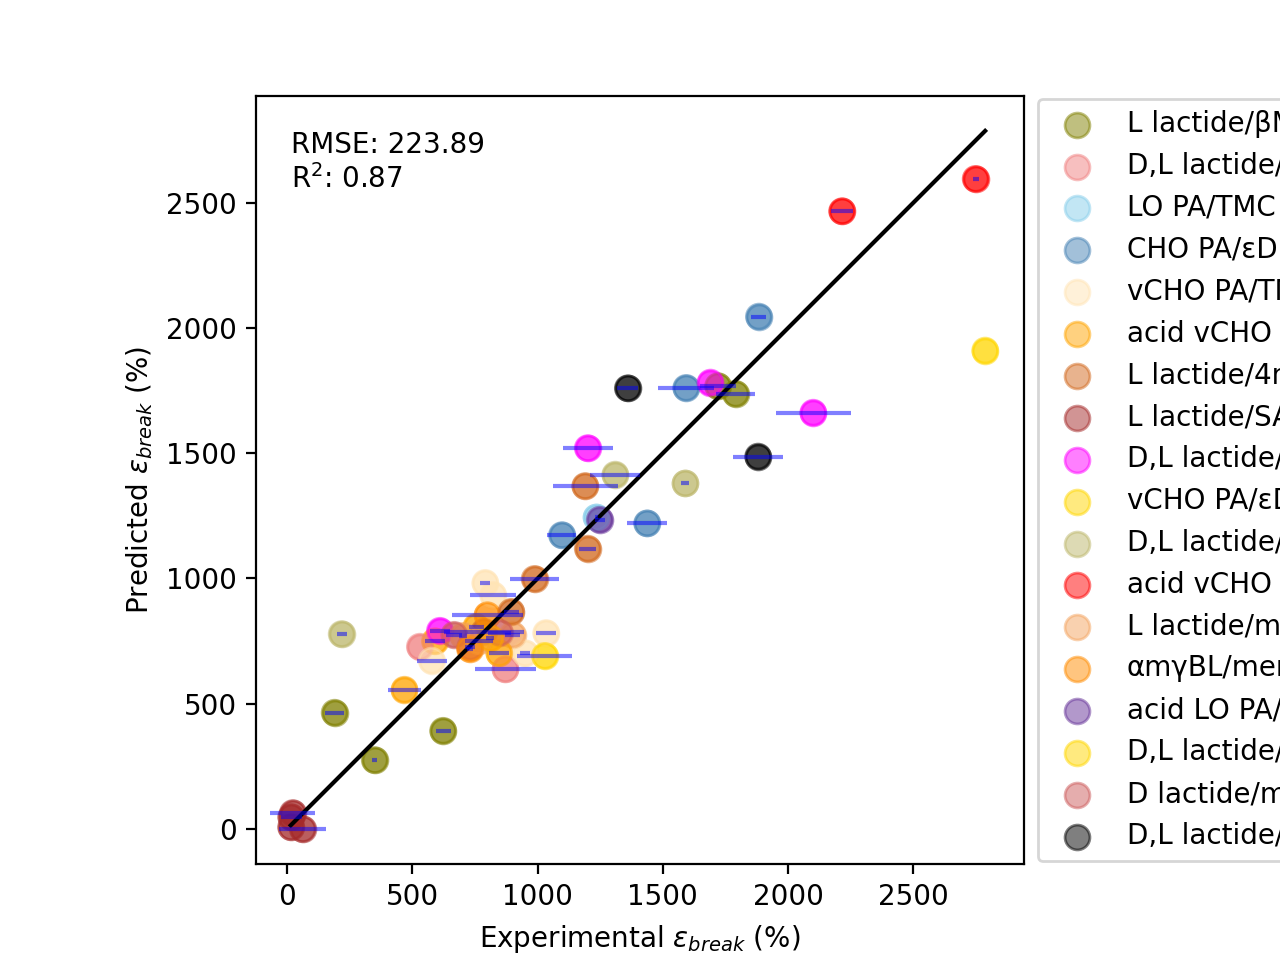

50125.05912999547
> Saving Results
Predicting εbreak (pct) For MF-5 MSE is, on average = 50125.0591 and std dev of MSE = 115037.6443
Training εbreak (pct) For MF-5 MSE is, on average = 7071.732 and std dev of MSE = 550.5772
>> Saving traning error


In [309]:
%matplotlib inline
%matplotlib notebook 

# For εbreak (pct)
targets_to_best_performing_method = {
        'εbreak (pct)': "MF-5", 
}


normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'ard', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = True,
                      with_shortest_paths = False,
                      n_shortest_paths_features = 1200,
                      RFE_selection = False,
                      RFE_selection_n_features = 50,
                      covar_feature_selection = False,
                      concatenate_depths = True)

Morgan Fingerprints Selected
> Number of data points for εbreak (pct) is 53
> With shortest paths =  False
> With concatenate depth =  True
>> Testing GraKeL kernel: MFB-5
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [779.01179678]
y_test:  [1720.]
MSE of train:  86178.55296853773
index_test_is [30]
graph is 44
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [814.56602738]
y_test:  [872.]
MSE of train:  102855.68411792134
index_test_is [2]
graph is 11
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [889.51294689]
y_test:  [1235.]
MSE of train:  104689.32873952217
index_test_is [51]
graph is 87
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [1615.24760765]
y_test:  [1097.]
MSE of train:  98094.27572943362
index_test_is [32]
graph is 51
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [775.1177229]
y_test:  [1790.]
MSE of train:  83381.53952451593
index_tes

y_pred  [58.8124029]
y_test:  [62.4]
MSE of train:  103983.0149652026
index_test_is [11]
graph is 20
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [835.8340101]
y_test:  [731.]
MSE of train:  103712.28458966545
index_test_is [9]
graph is 18
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [833.45114758]
y_test:  [765.]
MSE of train:  103845.76440102415
index_test_is [8]
graph is 17
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [74.7130351]
y_test:  [16.7]
MSE of train:  104016.03327722917
index_test_is [12]
graph is 21
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [792.1553116]
y_test:  [812.]
MSE of train:  103420.0816542729
index_test_is [43]
graph is 74
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [835.92802674]
y_test:  [730.]
MSE of train:  103707.45163475632
index_test_is [37]
graph is 58


<IPython.core.display.Javascript object>


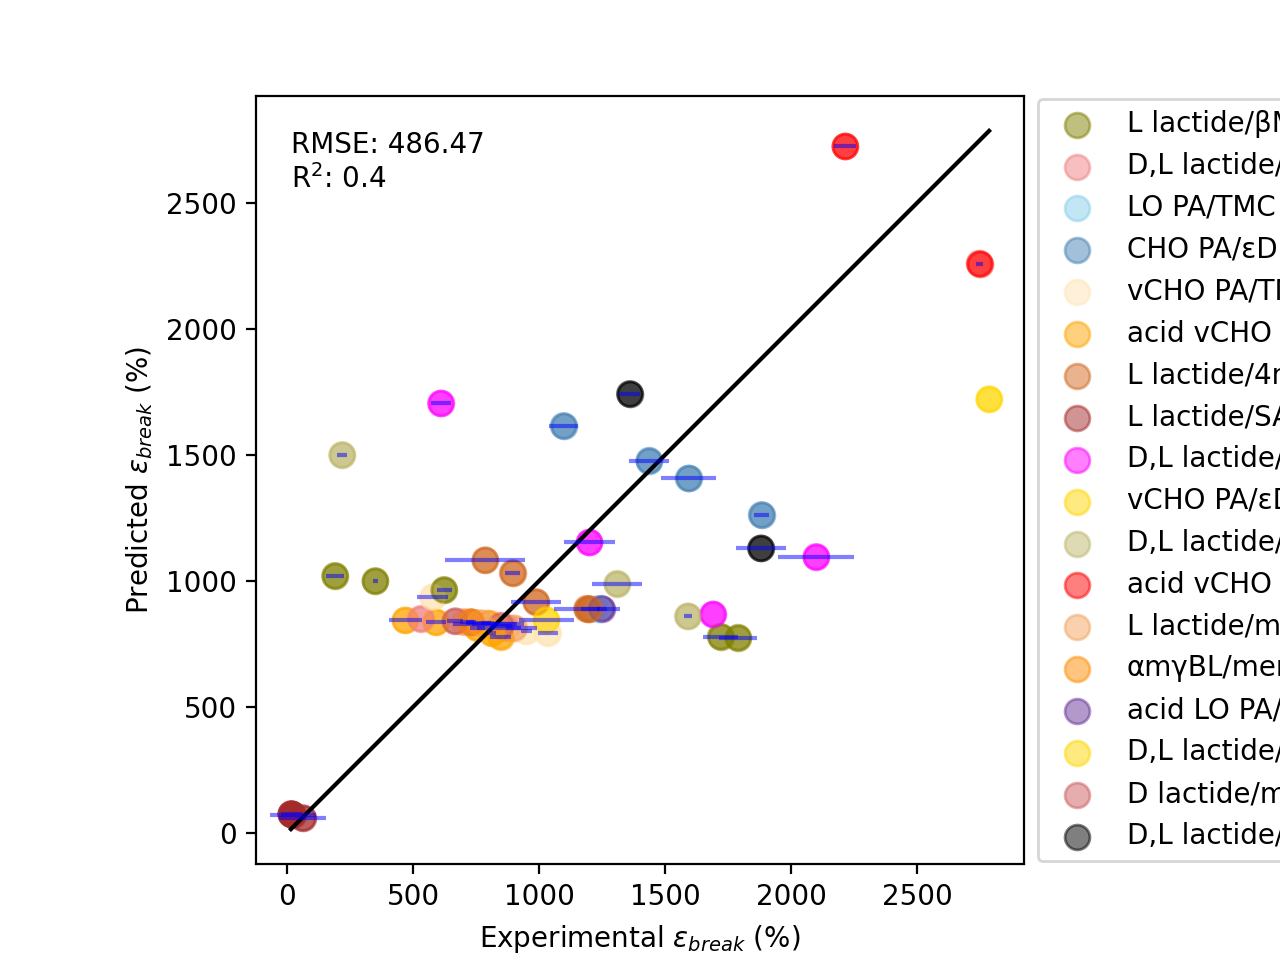

236652.05920059312
> Saving Results
Predicting εbreak (pct) For MFB-5 MSE is, on average = 236652.0592 and std dev of MSE = 377128.9691
Training εbreak (pct) For MFB-5 MSE is, on average = 100710.7838 and std dev of MSE = 5341.3971
>> Saving traning error


In [274]:
%matplotlib inline
%matplotlib notebook 

# For εbreak (pct)

targets_to_best_performing_method = {
        'εbreak (pct)': "MFB-5", 
}


normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'ard', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = False,
                      n_shortest_paths_features = 1200,
                      RFE_selection = False,
                      RFE_selection_n_features = 50,
                      covar_feature_selection = False,
                      concatenate_depths = True)

In [1]:
%matplotlib inline
%matplotlib notebook 

# For εbreak (pct)
targets_to_best_performing_method = {
        'εbreak (pct)': "MF-1", 
}


normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'ard', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = False,
                      n_shortest_paths_features = 1200,
                      RFE_selection = False,
                      RFE_selection_n_features = 50,
                      covar_feature_selection = False,
                      concatenate_depths = True)

NameError: name 'df' is not defined

In [87]:
%matplotlib inline
%matplotlib notebook 

# For εbreak (pct)
targets_to_best_performing_method = {
        'εbreak (pct)': "WLB-3", 
}
targets_to_best_performing_method = {
        'εbreak (pct)': "Morgan", 
}


normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'ard', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = True,
                      with_shortest_paths = False,
                      n_shortest_paths_features = 1200,
                      RFE_selection = False,
                      RFE_selection_n_features = 50,
                      covar_feature_selection = True,
                      concatenate_depths = True)

> Number of data points for εbreak (pct) is 53
> With shortest paths =  False
> With concatenate depth =  True
>> Testing GraKeL kernel: Morgan
length before selection: 488
length after selection: 101
y_pred  [877.25226599]
y_test:  [1720.]
MSE of train:  154678.69833328828
index_test_is [30]
graph is 44
length before selection: 488
length after selection: 101
y_pred  [936.24788407]
y_test:  [872.]
MSE of train:  160599.75078124067
index_test_is [2]
graph is 11
length before selection: 488
length after selection: 101
y_pred  [2859.75077157]
y_test:  [1235.]
MSE of train:  141220.20321905968
index_test_is [51]
graph is 87
length before selection: 488
length after selection: 101
y_pred  [1073.54370575]
y_test:  [1097.]
MSE of train:  160825.48153744827
index_test_is [32]
graph is 51
length before selection: 488
length after selection: 101
y_pred  [826.37955434]
y_test:  [1790.]
MSE of train:  147752.9865192945
index_test_is [31]
graph is 45
length before selection: 488
length after selec

KeyboardInterrupt: 

Morgan Fingerprints Selected
> Number of data points for σbreak (MPa) is 51
> With shortest paths =  True
> With concatenate depth =  False
>> Testing GraKeL kernel: MF-5
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors

<IPython.core.display.Javascript object>


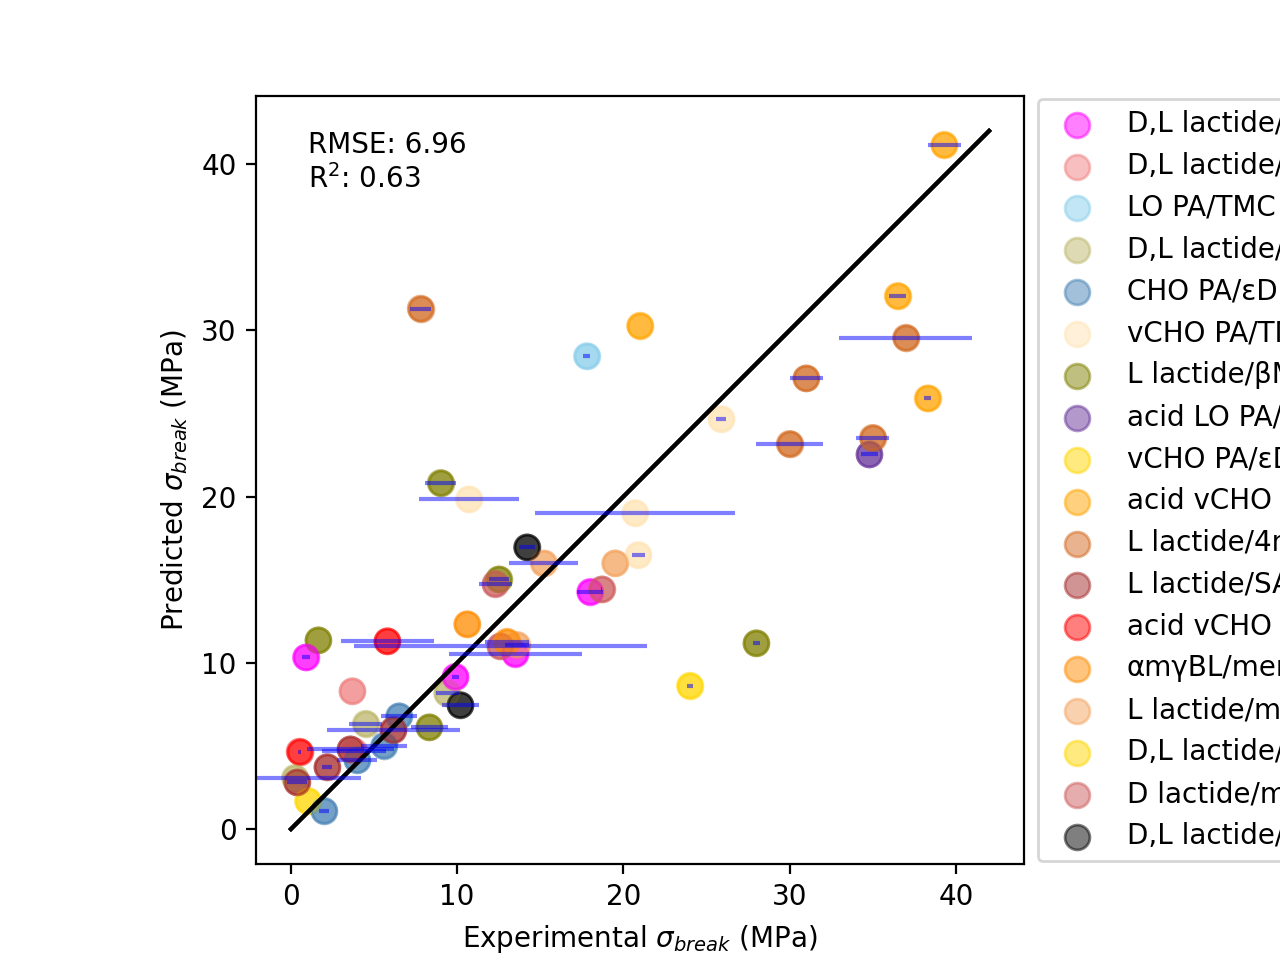

48.487814805292466
> Saving Results
Predicting σbreak (MPa) For MF-5 MSE is, on average = 48.4878 and std dev of MSE = 94.7474
Training σbreak (MPa) For MF-5 MSE is, on average = 15.394 and std dev of MSE = 1.4649
>> Saving traning error


In [279]:
# For σbreak (MPa) 
targets_to_best_performing_method = {
        'σbreak (MPa)': "WLB-5", 
}

targets_to_best_performing_method = {
        'σbreak (MPa)': "MF-5", 
}

normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = True,
                      n_shortest_paths_features = 1200,
                      RFE_selection = True,
                      RFE_selection_n_features = 900,
                      covar_feature_selection = True,
                      concatenate_depths = False)

Morgan Fingerprints Selected
> Number of data points for σbreak (MPa) is 51
> With shortest paths =  False
> With concatenate depth =  False
>> Testing GraKeL kernel: MFB-5
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morg

<IPython.core.display.Javascript object>


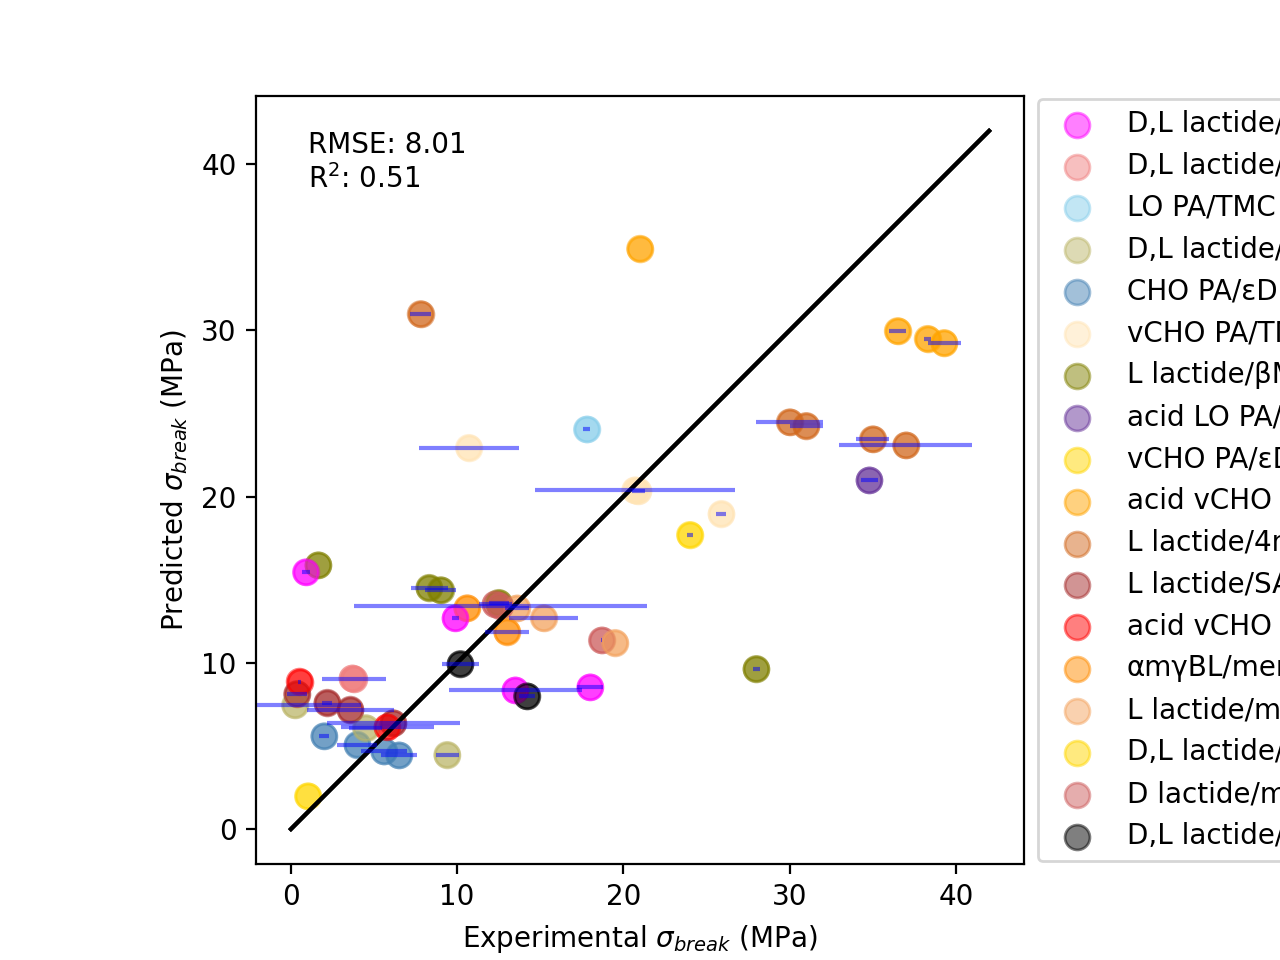

64.18507841462106
> Saving Results
Predicting σbreak (MPa) For MFB-5 MSE is, on average = 64.1851 and std dev of MSE = 98.164
Training σbreak (MPa) For MFB-5 MSE is, on average = 34.925 and std dev of MSE = 2.3603
>> Saving traning error


In [285]:
# For σbreak (MPa) 
targets_to_best_performing_method = {
        'σbreak (MPa)': "WLB-5", 
}

targets_to_best_performing_method = {
        'σbreak (MPa)': "MFB-5", 
}

normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = False,
                      n_shortest_paths_features = 1200,
                      RFE_selection = True,
                      RFE_selection_n_features = 900,
                      covar_feature_selection = True,
                      concatenate_depths = False)

In [ ]:
# For σbreak (MPa) 
targets_to_best_performing_method = {
        'σbreak (MPa)': "WLB-5", 
}

targets_to_best_performing_method = {
        'σbreak (MPa)': "Morgan", 
}

normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = True,
                      n_shortest_paths_features = 1200,
                      RFE_selection = True,
                      RFE_selection_n_features = 900,
                      covar_feature_selection = True,
                      concatenate_depths = False)

> Number of data points for Tg is 65
> With shortest paths =  True
> With concatenate depth =  False
>> Testing GraKeL kernel: Morgan
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  488
Size of feature vectors:  

<IPython.core.display.Javascript object>


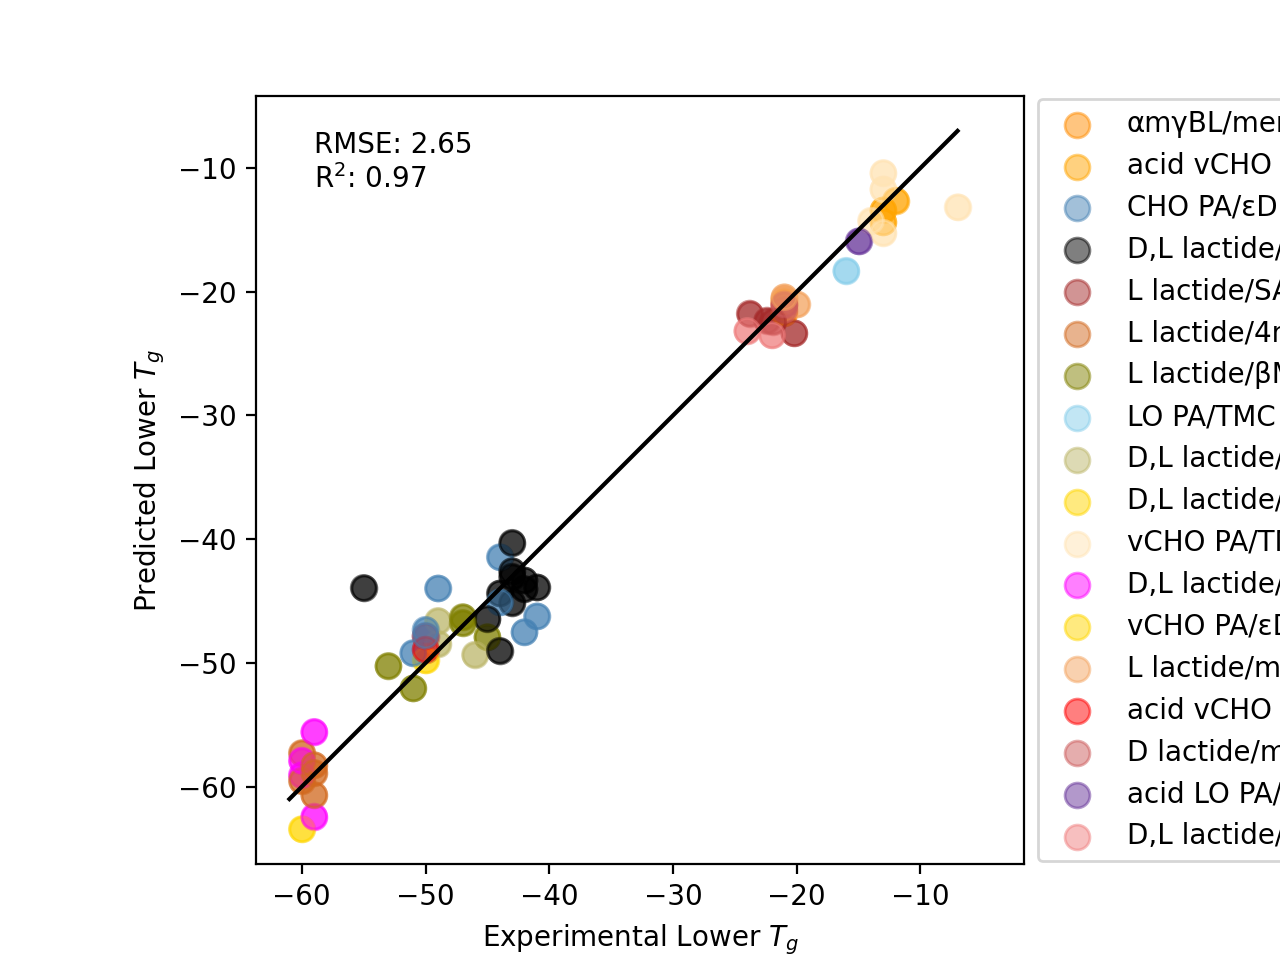

7.004265612441083
> Saving Results
Predicting Tg For Morgan MSE is, on average = 7.0043 and std dev of MSE = 16.4269
Training Tg For Morgan MSE is, on average = 3.3537 and std dev of MSE = 0.2232
>> Saving traning error


In [218]:
# For Tg 
targets_to_best_performing_method = {
        'Tg': "WLB-3", 
}
targets_to_best_performing_method = {
        'Tg': "Morgan", 
}

normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = True,
                      n_shortest_paths_features = 1200,
                      RFE_selection = True,
                      RFE_selection_n_features = 1000,
                      covar_feature_selection = True,
                      concatenate_depths = False)

Morgan Fingerprints Selected
> Number of data points for Tg is 65
> With shortest paths =  True
> With concatenate depth =  False
>> Testing GraKeL kernel: MF-5
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Size of feature vectors:  1184
Si

<IPython.core.display.Javascript object>


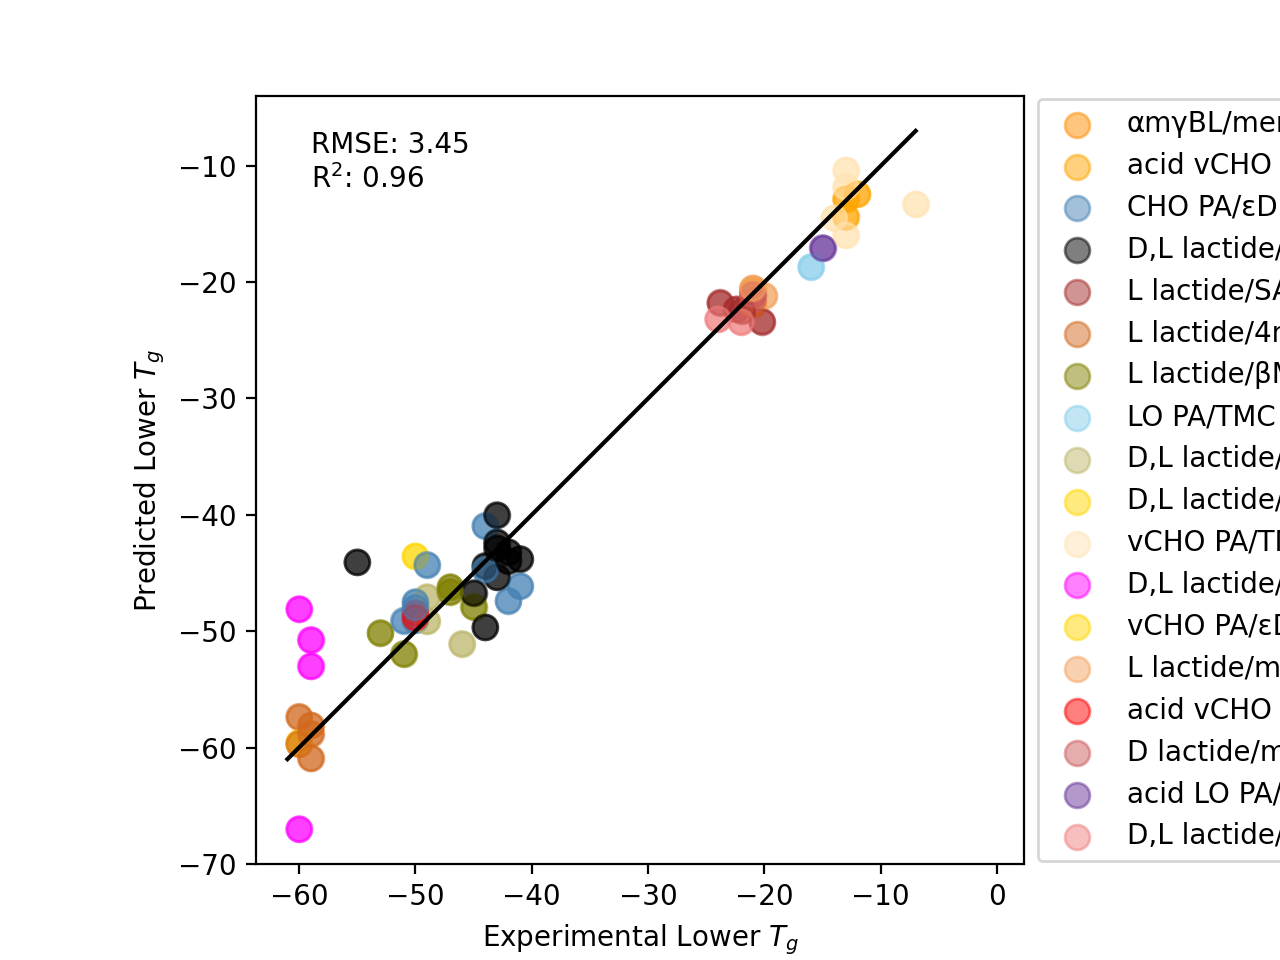

11.927220793171747
> Saving Results
Predicting Tg For MF-5 MSE is, on average = 11.9272 and std dev of MSE = 25.2188
Training Tg For MF-5 MSE is, on average = 3.341 and std dev of MSE = 0.2283
>> Saving traning error


In [290]:
# For Tg 
targets_to_best_performing_method = {
        'Tg': "WLB-3", 
}
targets_to_best_performing_method = {
        'Tg': "MF-5", 
}

normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = True,
                      n_shortest_paths_features = 1200,
                      RFE_selection = True,
                      RFE_selection_n_features = 1000,
                      covar_feature_selection = True,
                      concatenate_depths = False)

Morgan Fingerprints Selected
> Number of data points for Tg is 65
> With shortest paths =  True
> With concatenate depth =  False
>> Testing GraKeL kernel: MFB-5
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
Size of feature vectors:  1184
Morgan Fingerpr

<IPython.core.display.Javascript object>


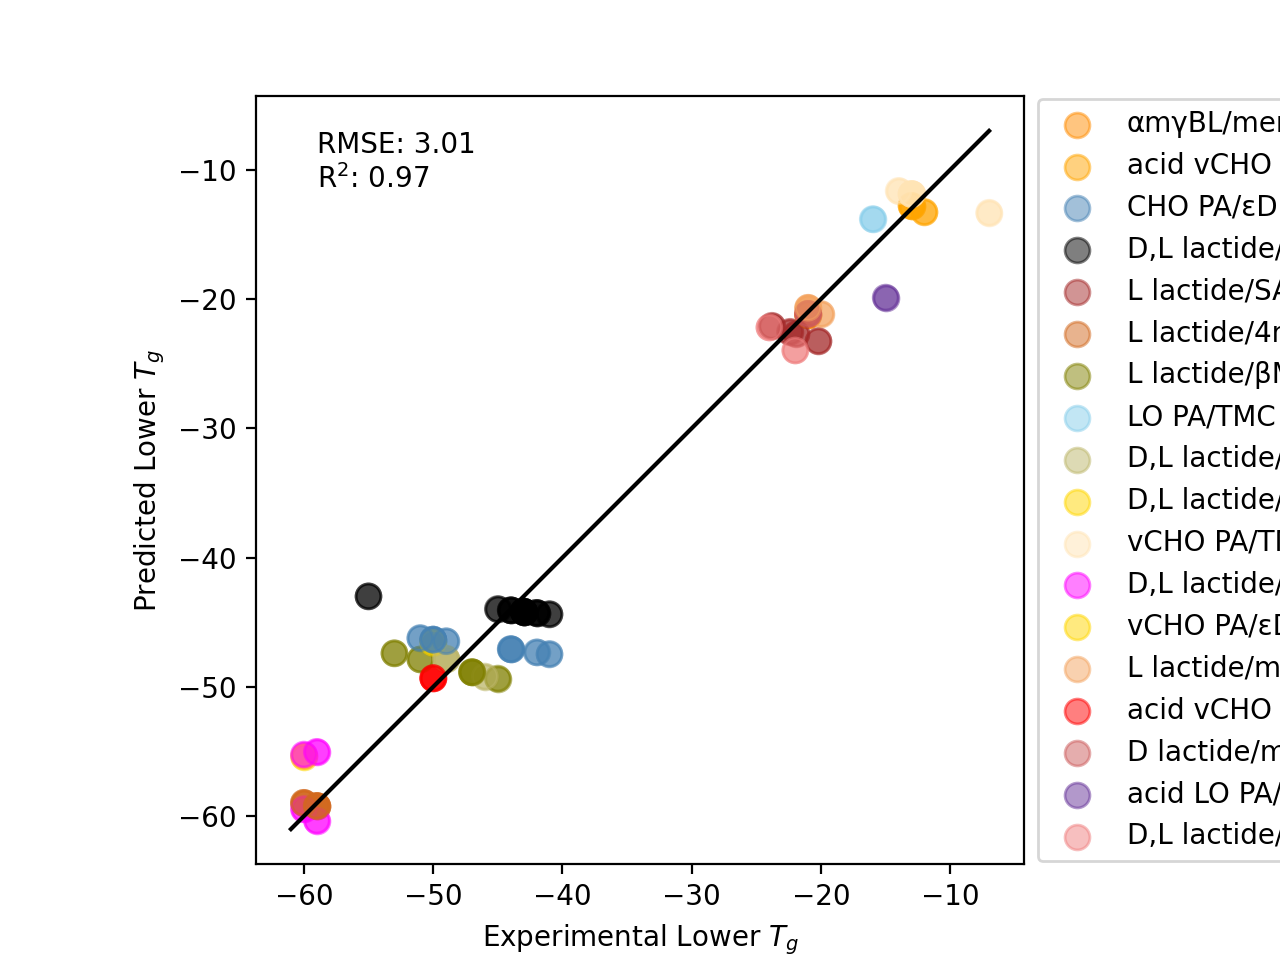

9.06574612655299
> Saving Results
Predicting Tg For MFB-5 MSE is, on average = 9.0657 and std dev of MSE = 19.5164
Training Tg For MFB-5 MSE is, on average = 5.5907 and std dev of MSE = 0.2755
>> Saving traning error


In [295]:
# For Tg 
targets_to_best_performing_method = {
        'Tg': "WLB-3", 
}
targets_to_best_performing_method = {
        'Tg': "MFB-5", 
}

normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = False,
                      with_shortest_paths = True,
                      n_shortest_paths_features = 1200,
                      RFE_selection = True,
                      RFE_selection_n_features = 1000,
                      covar_feature_selection = True,
                      concatenate_depths = False)

Morgan Fingerprints Selected
> Number of data points for Tg2 is 59
> With shortest paths =  False
> With concatenate depth =  True
>> Testing GraKeL kernel: MF-5
Size of feature vectors:  1184
y_pred  [98.71301381]
y_test:  [100.]
MSE of train:  16.73442834681808
index_test_is [49]
graph is 71
Size of feature vectors:  1184
y_pred  [38.15050111]
y_test:  [38.]
MSE of train:  16.837456640043808
index_test_is [2]
graph is 2
Size of feature vectors:  1184
y_pred  [42.00483199]
y_test:  [30.]
MSE of train:  15.189228620475156
index_test_is [35]
graph is 45
Size of feature vectors:  1184
y_pred  [109.1741481]
y_test:  [123.]
MSE of train:  15.631174409996223
index_test_is [47]
graph is 69
Size of feature vectors:  1184
y_pred  [132.69543072]
y_test:  [126.]
MSE of train:  16.011151297588555
index_test_is [39]
graph is 49
Size of feature vectors:  1184
y_pred  [31.31685378]
y_test:  [43.]
MSE of train:  15.184205979209569
index_test_is [34]
graph is 44
Size of feature vectors:  1184
y_pred  

<IPython.core.display.Javascript object>


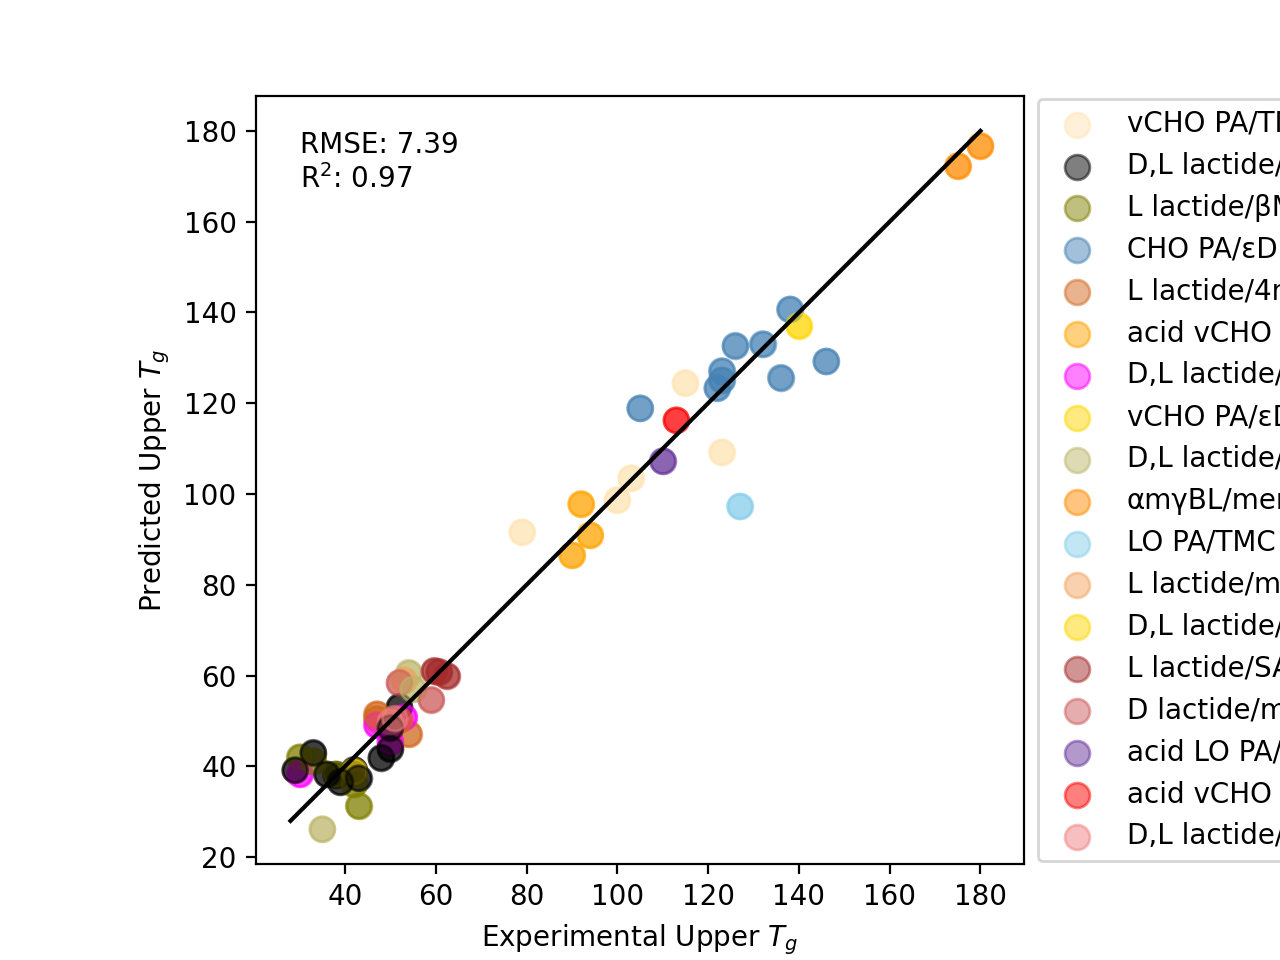

54.558318396261676
> Saving Results
Predicting Tg2 For MF-5 MSE is, on average = 54.5583 and std dev of MSE = 123.3782
Training Tg2 For MF-5 MSE is, on average = 16.3764 and std dev of MSE = 0.7753
>> Saving traning error


In [302]:
%matplotlib inline
%matplotlib notebook 

# For Upper Tg 
targets_to_best_performing_method = {
        'Tg2': "WLB-3", 
}
targets_to_best_performing_method = {
        'Tg2': "MF-5", 
}
normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = True,
                      with_shortest_paths = False,
                      n_shortest_paths_features = 1200,
                      RFE_selection = False,
                      RFE_selection_n_features = 150,
                      covar_feature_selection = False,
                      concatenate_depths = True)

Morgan Fingerprints Selected
> Number of data points for Tg2 is 59
> With shortest paths =  False
> With concatenate depth =  True
>> Testing GraKeL kernel: MFB-5
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [105.60184159]
y_test:  [100.]
MSE of train:  61.43559493794605
index_test_is [49]
graph is 71
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [42.29553479]
y_test:  [38.]
MSE of train:  61.54681599107047
index_test_is [2]
graph is 2
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [39.71787247]
y_test:  [30.]
MSE of train:  60.69747457454553
index_test_is [35]
graph is 45
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [100.10430042]
y_test:  [123.]
MSE of train:  53.9112989071391
index_test_is [47]
graph is 69
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [127.87276794]
y_test:  [126.]
MSE of train:  61.756598330410185
index_test_is [39]
graph is 4

y_pred  [55.5727061]
y_test:  [59.]
MSE of train:  61.49345225684779
index_test_is [15]
graph is 18
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [41.3115432]
y_test:  [48.]
MSE of train:  61.071277679982195
index_test_is [5]
graph is 5
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [50.21272299]
y_test:  [50.]
MSE of train:  61.811364535082596
index_test_is [11]
graph is 11
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [41.11374602]
y_test:  [50.]
MSE of train:  60.50325682453044
index_test_is [9]
graph is 9
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [41.11374602]
y_test:  [50.]
MSE of train:  60.50325682453044
index_test_is [8]
graph is 8
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pred  [49.42206298]
y_test:  [51.]
MSE of train:  61.79503036289643
index_test_is [12]
graph is 12
Size of feature vectors:  1184
Morgan Fingerprints in Binary Form
y_pr

<IPython.core.display.Javascript object>


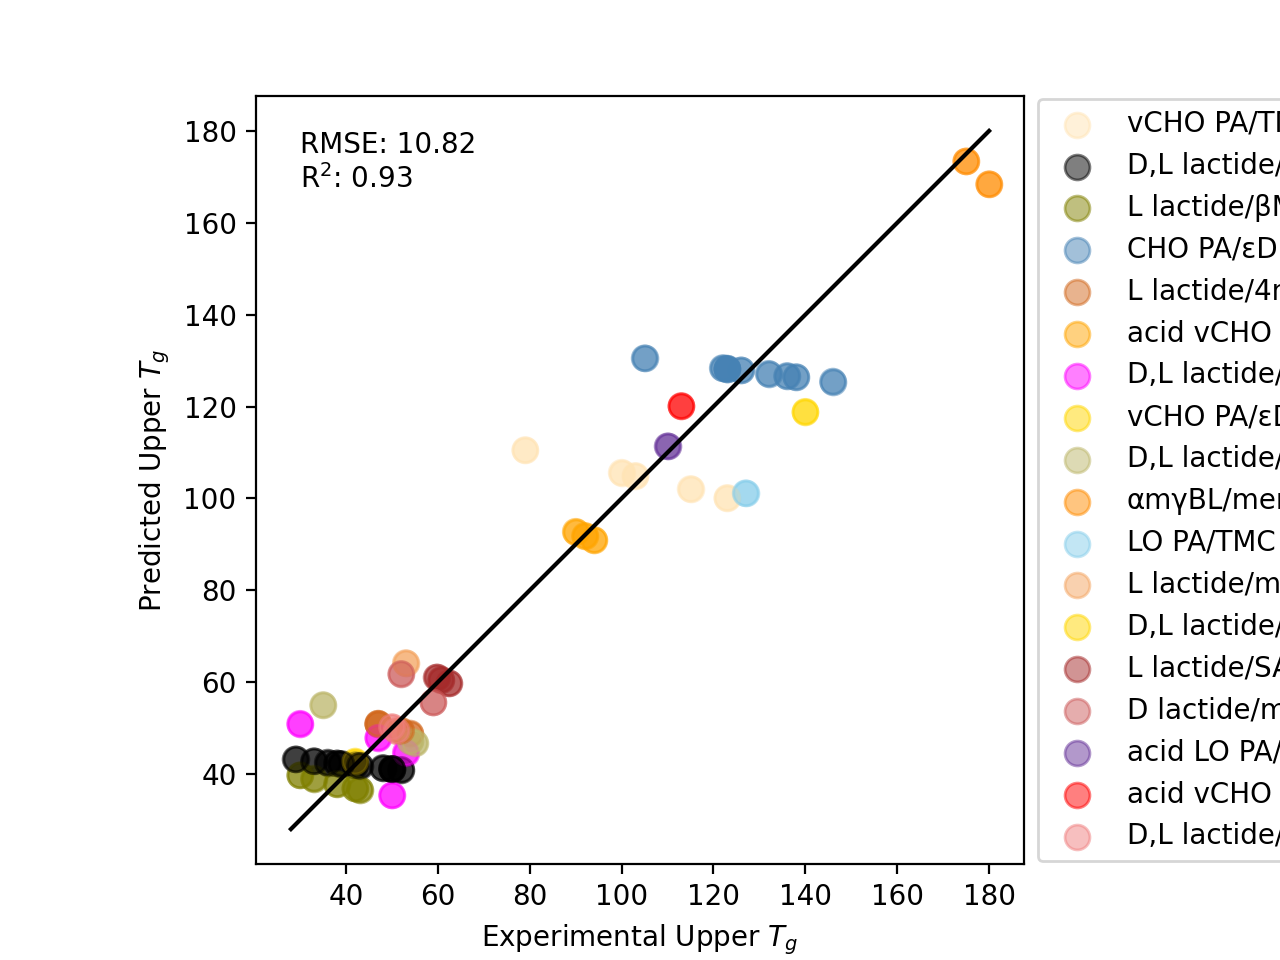

117.00490097670675
> Saving Results
Predicting Tg2 For MFB-5 MSE is, on average = 117.0049 and std dev of MSE = 198.087
Training Tg2 For MFB-5 MSE is, on average = 60.4916 and std dev of MSE = 2.5994
>> Saving traning error


In [307]:
%matplotlib inline
%matplotlib notebook 

# For Upper Tg 
targets_to_best_performing_method = {
        'Tg2': "WLB-3", 
}
targets_to_best_performing_method = {
        'Tg2': "MFB-5", 
}
normalise_explicit_vectors = True
for t in targets_to_best_performing_method:
    target = df[t]  
    target_var = df_var[t]
    kernels_to_test = [targets_to_best_performing_method[t]]
    NORMALIZING_GRAPH_KERNELS = False
#     for w_var_train in np.linspace(0, 1, num=11):
#         for w_var_train_tg_tg2 in np.linspace(0, 0.1, num=1):
    w_var_train = 0.4
    run_kernels_against_target(df, 
                       target, 
                       target_var,
                       Graphs, 
                       1,                               
                       kernels_to_test, 
                       learning_met = 'bayes', 
                       explicit_features = True, 
                       normalise = False, 
                       explanation = False,
                       extra_tests = [],
                       visualisation = True,
                        show_error_bars = True,
                      training_error= True,
#                                weight_y_var_train = 0.005,
                     weight_y_var_train = w_var_train,
                       weight_y_var_train_for_tg_and_tg2 = w_var_train,
                      truncate_to_zero_if_neg = True,
                      log_y = False, 
                      printing_results = True,
                      with_shortest_paths = False,
                      n_shortest_paths_features = 1200,
                      RFE_selection = False,
                      RFE_selection_n_features = 150,
                      covar_feature_selection = False,
                      concatenate_depths = True)